<a href="https://colab.research.google.com/github/mdfazilj/Ai-with-ml-engineer/blob/main/Copy_of_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
dataset=pd.read_csv("/content/Project 1 - Weather Dataset.csv")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [ ]:
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [ ]:
dataset["Weather"].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [ ]:
def map_weather(condition):
    c = str(condition).lower()
    if "clear" in c:
        return "Clear"
    if "cloud" in c:
        return "Cloud"
    if "rain" in c or "drizzle" in c or "shower" in c or "thunderstorm" in c:
        return "Rain"
    if "snow" in c or "pellet" in c or "flurries" in c or "fog" in c or "mist" in c or "haze" in c:
        return "Snow/Fog"
    return "Other"

dataset["Weather"] = dataset["Weather"].apply(map_weather)

In [ ]:
dataset.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [ ]:
ind=dataset[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa',]]

In [ ]:
dep=dataset[["Weather"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    class_weight="balanced",  # penalize misclassifications of minority classes
    random_state=42
)

In [ ]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', max_depth=15, n_estimators=300,
                       random_state=42)

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cls=classification_report(y_test, y_pred)

In [ ]:
print(cls)

              precision    recall  f1-score   support

       Clear       0.71      0.77      0.74       665
       Cloud       0.71      0.72      0.71       772
        Rain       0.73      0.54      0.63       178
    Snow/Fog       0.78      0.71      0.75       142

    accuracy                           0.72      1757
   macro avg       0.73      0.68      0.71      1757
weighted avg       0.72      0.72      0.72      1757



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
display(cm)

array([[511, 151,   1,   2],
       [194, 552,  20,   6],
       [  8,  53,  97,  20],
       [  5,  22,  14, 101]])

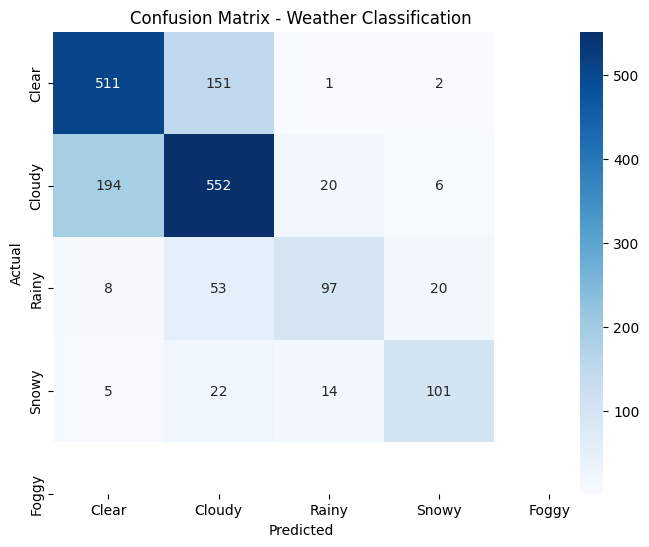

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Clear","Cloudy","Rainy","Snowy","Foggy"],
            yticklabels=["Clear","Cloudy","Rainy","Snowy","Foggy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Weather Classification")
plt.show()

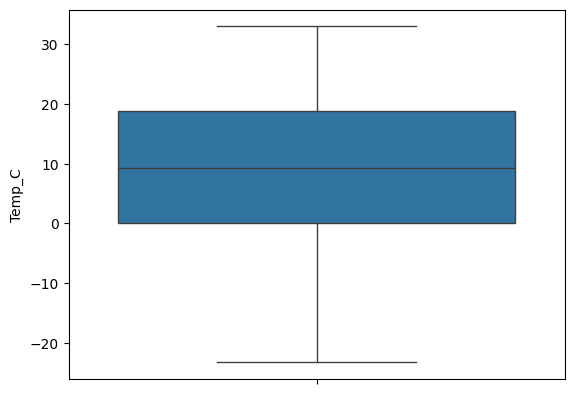

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=dataset['Temp_C'])
plt.show()

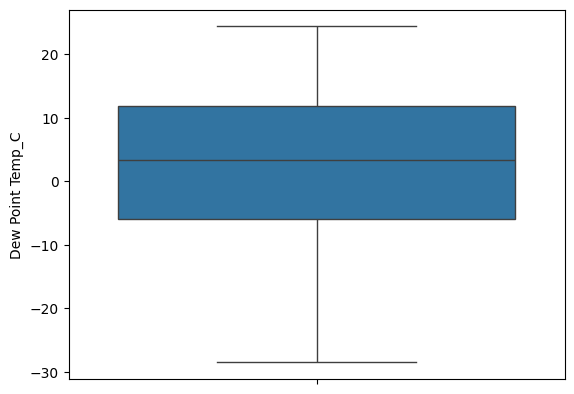

In [ ]:
sns.boxplot(data=dataset['Dew Point Temp_C'])
plt.show()

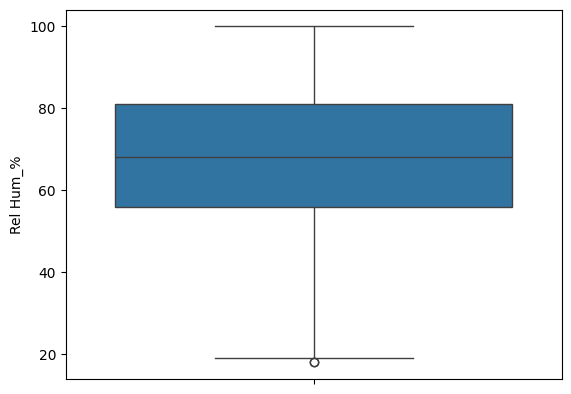

In [ ]:
sns.boxplot(data=dataset['Rel Hum_%'])
plt.show()

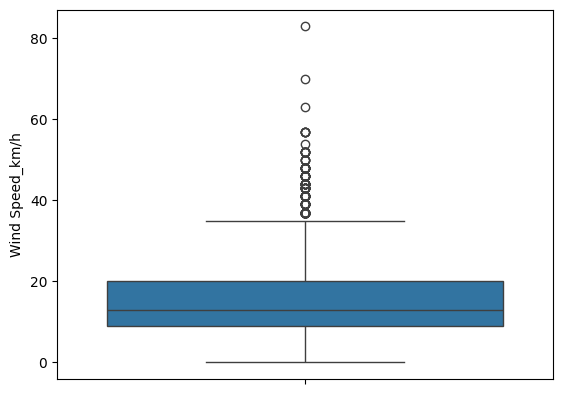

In [ ]:
sns.boxplot(data=dataset['Wind Speed_km/h'])
plt.show()

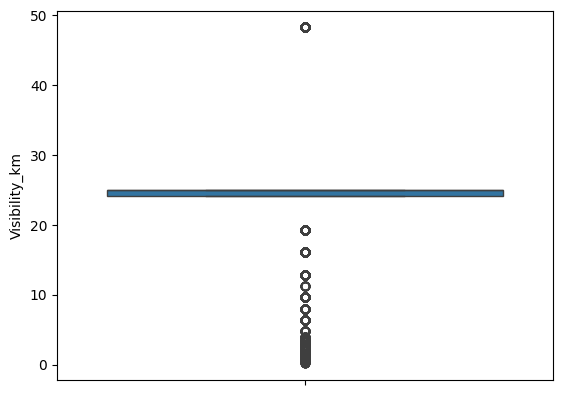

In [ ]:
sns.boxplot(data=dataset['Visibility_km'])
plt.show()

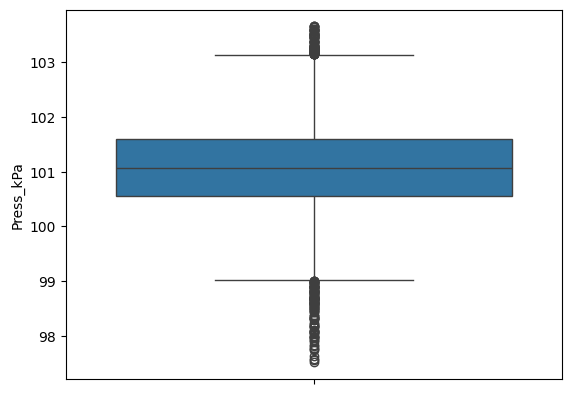

In [ ]:
sns.boxplot(data=dataset['Press_kPa'])
plt.show()

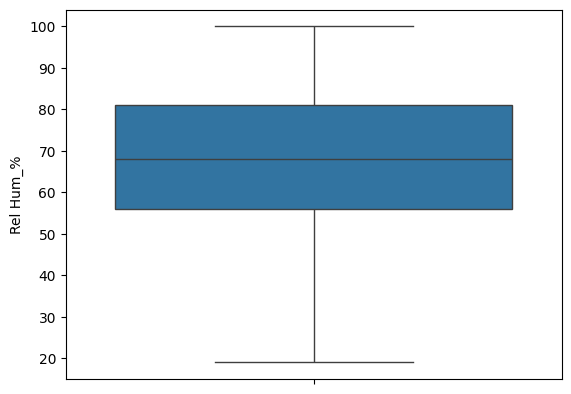

In [ ]:
Q1_rel_hum = dataset['Rel Hum_%'].quantile(0.25)
Q3_rel_hum = dataset['Rel Hum_%'].quantile(0.75)
IQR_rel_hum = Q3_rel_hum - Q1_rel_hum

# Define bounds for outliers
lower_bound_rel_hum = Q1_rel_hum - 1.5 * IQR_rel_hum
upper_bound_rel_hum = Q3_rel_hum + 1.5 * IQR_rel_hum

# Identify outliers
outliers_mask_rel_hum = (dataset['Rel Hum_%'] < lower_bound_rel_hum) | (dataset['Rel Hum_%'] > upper_bound_rel_hum)

# Calculate the median of the 'Rel Hum_%' column
median_rel_hum = dataset['Rel Hum_%'].median()

# Replace outliers with the median
dataset.loc[outliers_mask_rel_hum, 'Rel Hum_%'] = median_rel_hum

# Verify that outliers are replaced by checking the boxplot again
sns.boxplot(data=dataset['Rel Hum_%'])
plt.show()

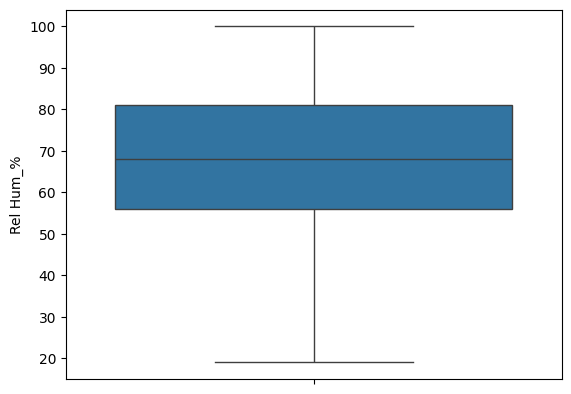

In [ ]:
Q1_rel_hum = dataset['Rel Hum_%'].quantile(0.25)
Q3_rel_hum = dataset['Rel Hum_%'].quantile(0.75)
IQR_rel_hum = Q3_rel_hum - Q1_rel_hum

# Define bounds for outliers
lower_bound_rel_hum = Q1_rel_hum - 1.5 * IQR_rel_hum
upper_bound_rel_hum = Q3_rel_hum + 1.5 * IQR_rel_hum

# Identify outliers
outliers_mask_rel_hum = (dataset['Rel Hum_%'] < lower_bound_rel_hum) | (dataset['Rel Hum_%'] > upper_bound_rel_hum)

# Calculate the median of the 'Rel Hum_%' column
median_rel_hum = dataset['Rel Hum_%'].median()

# Replace outliers with the median
dataset.loc[outliers_mask_rel_hum, 'Rel Hum_%'] = median_rel_hum

# Verify that outliers are replaced by checking the boxplot again
sns.boxplot(data=dataset['Rel Hum_%'])
plt.show()

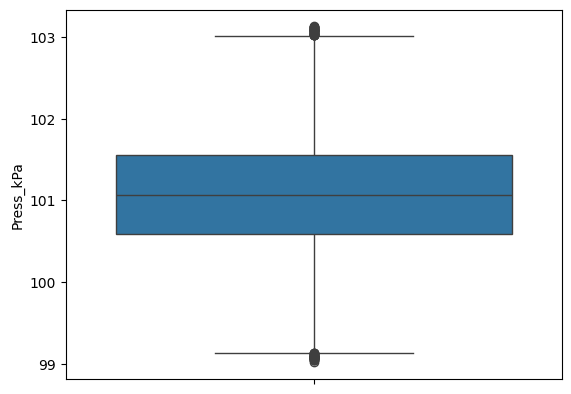

In [ ]:
# Calculate Q1, Q3, and IQR for 'Press_kPa'
Q1_press = dataset['Press_kPa'].quantile(0.25)
Q3_press = dataset['Press_kPa'].quantile(0.75)
IQR_press = Q3_press - Q1_press

# Define bounds for outliers
lower_bound_press = Q1_press - 1.5 * IQR_press
upper_bound_press = Q3_press + 1.5 * IQR_press

# Identify outliers
outliers_mask_press = (dataset['Press_kPa'] < lower_bound_press) | (dataset['Press_kPa'] > upper_bound_press)

# Calculate the median of the 'Press_kPa' column
median_press = dataset['Press_kPa'].median()

# Replace outliers with the median
dataset.loc[outliers_mask_press, 'Press_kPa'] = median_press

# Verify that outliers are replaced by checking the boxplot again
sns.boxplot(data=dataset['Press_kPa'])
plt.show()

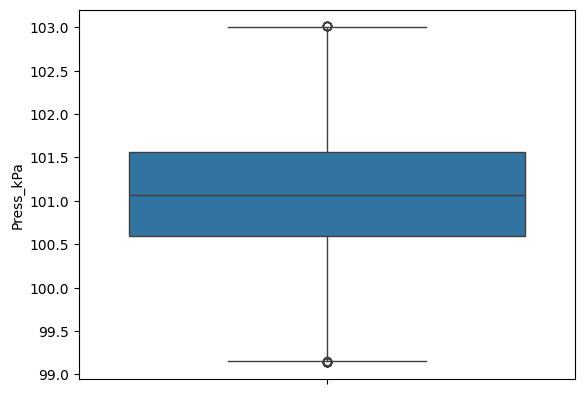

In [ ]:
# Calculate Q1, Q3, and IQR for 'Press_kPa'
Q1_press = dataset['Press_kPa'].quantile(0.25)
Q3_press = dataset['Press_kPa'].quantile(0.75)
IQR_press = Q3_press - Q1_press

# Define bounds for outliers
lower_bound_press = Q1_press - 1.5 * IQR_press
upper_bound_press = Q3_press + 1.5 * IQR_press

# Identify outliers
outliers_mask_press = (dataset['Press_kPa'] < lower_bound_press) | (dataset['Press_kPa'] > upper_bound_press)

# Calculate the median of the 'Press_kPa' column
median_press = dataset['Press_kPa'].median()

# Replace outliers with the median
dataset.loc[outliers_mask_press, 'Press_kPa'] = median_press

# Verify that outliers are replaced by checking the boxplot again
sns.boxplot(data=dataset['Press_kPa'])
plt.show()

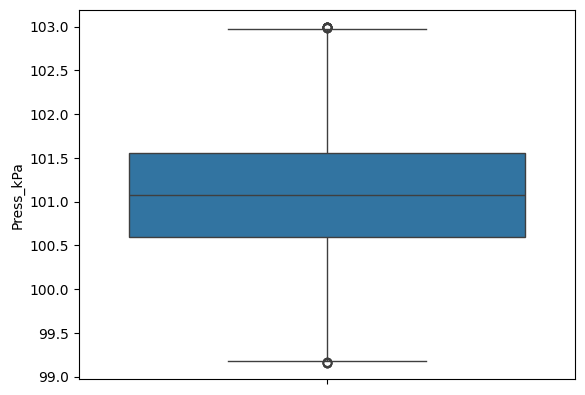

In [ ]:
# Calculate Q1, Q3, and IQR for 'Press_kPa'
Q1_press = dataset['Press_kPa'].quantile(0.25)
Q3_press = dataset['Press_kPa'].quantile(0.75)
IQR_press = Q3_press - Q1_press

# Define bounds for outliers
lower_bound_press = Q1_press - 1.5 * IQR_press
upper_bound_press = Q3_press + 1.5 * IQR_press

# Identify outliers
outliers_mask_press = (dataset['Press_kPa'] < lower_bound_press) | (dataset['Press_kPa'] > upper_bound_press)

# Calculate the median of the 'Press_kPa' column
median_press = dataset['Press_kPa'].median()

# Replace outliers with the median
dataset.loc[outliers_mask_press, 'Press_kPa'] = median_press

# Verify that outliers are replaced by checking the boxplot again
sns.boxplot(data=dataset['Press_kPa'])
plt.show()

Skewness of Temp_C: -0.17766634898276745


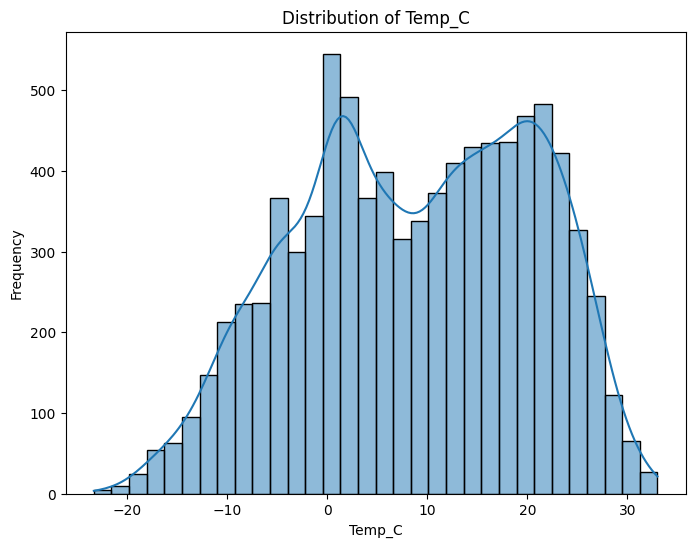

In [ ]:
# Skewness for 'Temp_C'
skewness_temp_c = dataset['Temp_C'].skew()
print(f"Skewness of Temp_C: {skewness_temp_c}")

# Visualization for 'Temp_C'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Temp_C', kde=True)
plt.title('Distribution of Temp_C')
plt.xlabel('Temp_C')
plt.ylabel('Frequency')
plt.show()

Skewness of Press_kPa: -0.10729559872964814


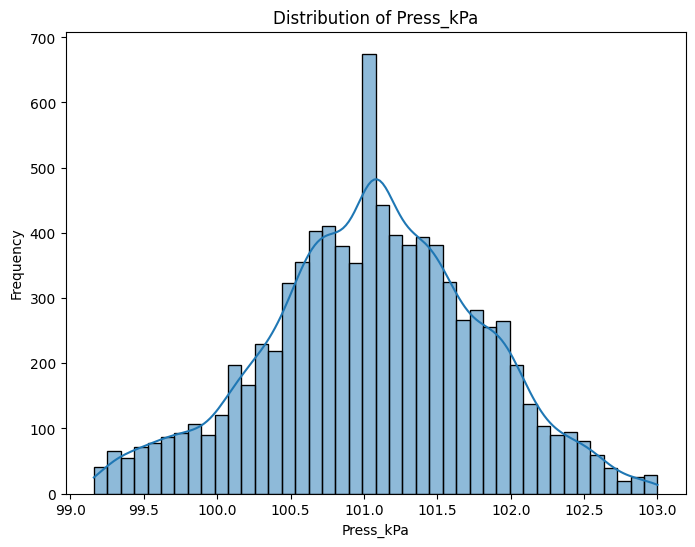

In [ ]:
# Skewness for 'Press_kPa'
skewness_press_kpa = dataset['Press_kPa'].skew()
print(f"Skewness of Press_kPa: {skewness_press_kpa}")

# Visualization for 'Press_kPa'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Press_kPa', kde=True)
plt.title('Distribution of Press_kPa')
plt.xlabel('Press_kPa')
plt.ylabel('Frequency')
plt.show()

Skewness of Dew Point Temp_C: -0.31843338608156885


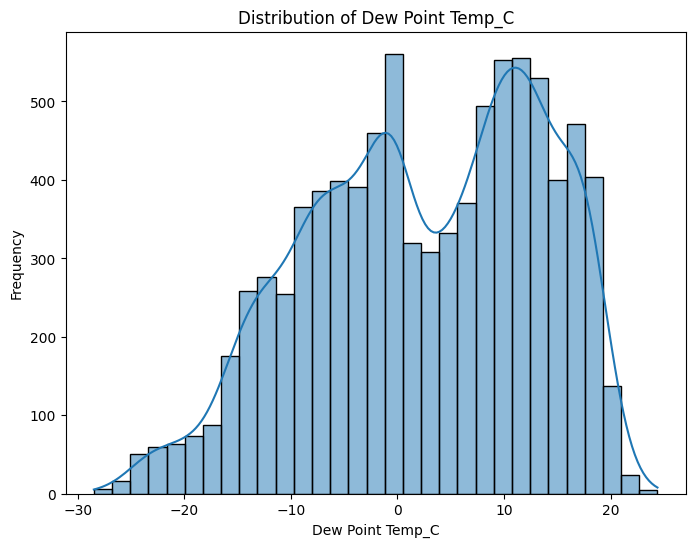

In [ ]:
# Skewness for 'Dew Point Temp_C'
skewness_dew_point = dataset['Dew Point Temp_C'].skew()
print(f"Skewness of Dew Point Temp_C: {skewness_dew_point}")

# Visualization for 'Dew Point Temp_C'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Dew Point Temp_C', kde=True)
plt.title('Distribution of Dew Point Temp_C')
plt.xlabel('Dew Point Temp_C')
plt.ylabel('Frequency')
plt.show()

Skewness of Rel Hum_%: -0.3211007950958493


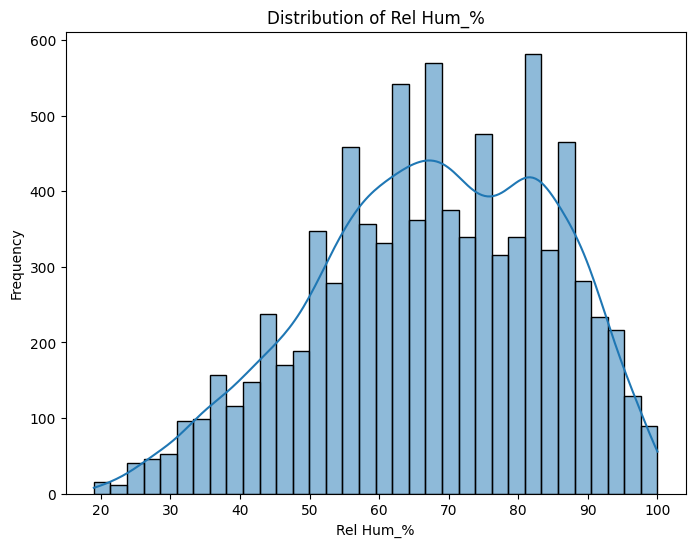

In [ ]:
# Skewness for 'Rel Hum_%'
skewness_rel_hum = dataset['Rel Hum_%'].skew()
print(f"Skewness of Rel Hum_%: {skewness_rel_hum}")

# Visualization for 'Rel Hum_%'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Rel Hum_%', kde=True)
plt.title('Distribution of Rel Hum_%')
plt.xlabel('Rel Hum_%')
plt.ylabel('Frequency')
plt.show()

Skewness of Temp_C: -0.17766634898276745


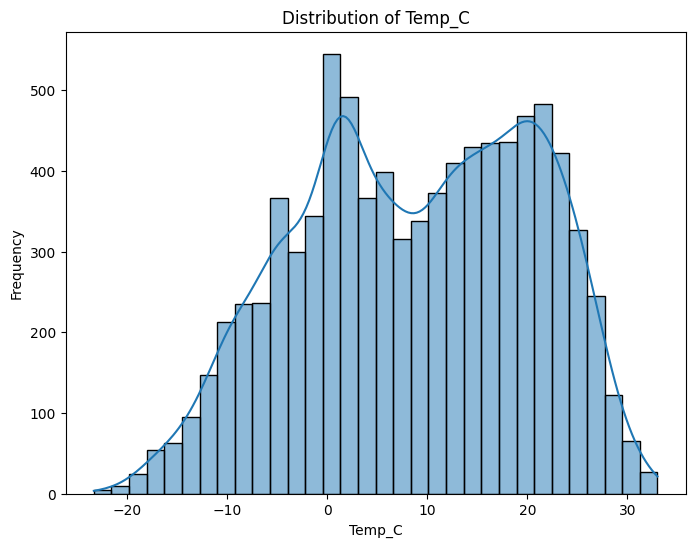

In [ ]:
# Skewness for 'Temp_C'
skewness_temp_c = dataset['Temp_C'].skew()
print(f"Skewness of Temp_C: {skewness_temp_c}")

# Visualization for 'Temp_C'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Temp_C', kde=True)
plt.title('Distribution of Temp_C')
plt.xlabel('Temp_C')
plt.ylabel('Frequency')
plt.show()

Skewness of Visibility_km: 0.41336159676061063


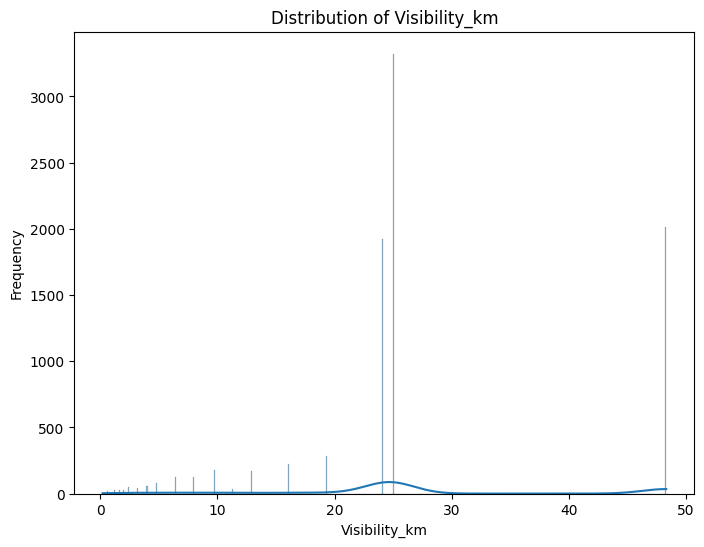

In [ ]:
# Skewness for 'Visibility_km'
skewness_visibility_km = dataset['Visibility_km'].skew()
print(f"Skewness of Visibility_km: {skewness_visibility_km}")

# Visualization for 'Visibility_km'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(data=dataset, x='Visibility_km', kde=True)
plt.title('Distribution of Visibility_km')
plt.xlabel('Visibility_km')
plt.ylabel('Frequency')
plt.show()

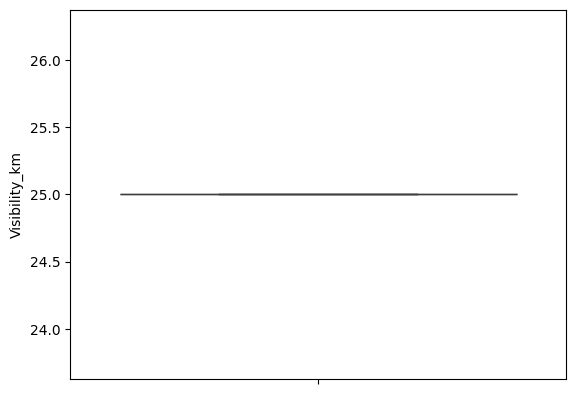

In [ ]:
# Calculate Q1, Q3, and IQR for 'Visibility_km'
Q1_visibility = dataset['Visibility_km'].quantile(0.25)
Q3_visibility = dataset['Visibility_km'].quantile(0.75)
IQR_visibility = Q3_visibility - Q1_visibility

# Define bounds for outliers
lower_bound_visibility = Q1_visibility - 1.5 * IQR_visibility
upper_bound_visibility = Q3_visibility + 1.5 * IQR_visibility

# Identify outliers
outliers_mask_visibility = (dataset['Visibility_km'] < lower_bound_visibility) | (dataset['Visibility_km'] > upper_bound_visibility)

# Calculate the median of the 'Visibility_km' column
median_visibility = dataset['Visibility_km'].median()

# Replace outliers with the median
dataset.loc[outliers_mask_visibility, 'Visibility_km'] = median_visibility

# Verify that outliers are replaced by checking the boxplot again
sns.boxplot(data=dataset['Visibility_km'])
plt.show()

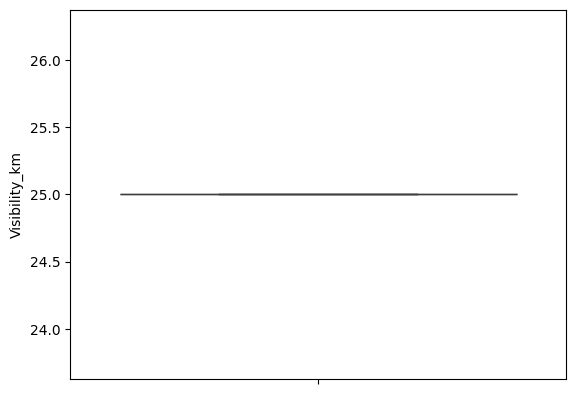

In [ ]:
# Calculate Q1, Q3, and IQR for 'Visibility_km'
Q1_visibility = dataset['Visibility_km'].quantile(0.25)
Q3_visibility = dataset['Visibility_km'].quantile(0.75)
IQR_visibility = Q3_visibility - Q1_visibility

# Define bounds for outliers
lower_bound_visibility = Q1_visibility - 1.5 * IQR_visibility
upper_bound_visibility = Q3_visibility + 1.5 * IQR_visibility

# Identify outliers
outliers_mask_visibility = (dataset['Visibility_km'] < lower_bound_visibility) | (dataset['Visibility_km'] > upper_bound_visibility)

# Calculate the median of the 'Visibility_km' column
median_visibility = dataset['Visibility_km'].median()

# Replace outliers with the median
dataset.loc[outliers_mask_visibility, 'Visibility_km'] = median_visibility

# Verify that outliers are replaced by checking the boxplot again
sns.boxplot(data=dataset['Visibility_km'])
plt.show()

**Reasoning**:
Inspect the data types of each column in the dataset to identify numerical columns.

